# ADS 2017. Homework 1

# Author: Zhiao Zhou, ADS 2017

### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.02$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.02.

(c) There could be some strong linear relationship between $x$ and $y$.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

## (d)

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x triples (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'<3y$ if b is less than one.

(b) $y'=3y$ in any case.

(c) $y'$ increases by $(2^b-1)*100\%$.

(d) $y'>3y$ if b is bigger than one.

## (a)(d)

In [121]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Question (3): (30 pt)


In [122]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [123]:
y=[14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
   55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [124]:
xy = [a*b for a,b in zip(x,y)]
xsqr = [a*a for a in x]
ysqr = [b*b for b in y]

In [125]:
corr_xy = (np.mean(xy)-np.mean(x)*np.mean(y))/(((np.mean(xsqr)-(np.mean(x))**2)**0.5)*((np.mean(ysqr)-(np.mean(y))**2)**0.5))
print(corr_xy)

0.956301005112


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [126]:
data = pd.DataFrame({"x":x,"y":y})

In [127]:
data["x_sqr"]=data.x*data.x
data["xy"]=data.x*data.y
data.head()

,x,y,x_sqr,xy
0,0,14.0,0,0.0
1,1,12.0,1,12.0
2,2,18.0,4,36.0
3,3,-4.0,9,-12.0
4,4,14.0,16,56.0


In [128]:
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x_sqr.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w1 is : 5.28872180451
w0 is : 1.95714285714


In [129]:
data["pred"]=w1*data.x+w0
data["err"]=data.y-data.pred
data.head()

,x,y,x_sqr,xy,pred,err
0,0,14.0,0,0.0,1.957143,12.042857
1,1,12.0,1,12.0,7.245865,4.754135
2,2,18.0,4,36.0,12.534586,5.465414
3,3,-4.0,9,-12.0,17.823308,-21.823308
4,4,14.0,16,56.0,23.112030,-9.112030


In [130]:
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
print("R2 is : {}".format(R_2))

R2 is : 0.914511612377


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [131]:
lg = smf.ols(formula='y~x',data=data).fit()

In [132]:
lg.params

Intercept    1.957143
x            5.288722
dtype: float64

In [133]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           4.71e-11
Time:                        00:47:47   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9571      4.236      0.462      0.650        -6.941    10.856
x              5.2887      0.381     13.876      0.000         4.488     6.089
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.245
Skew:                          -0.572   Prob(JB):                        0.537
Kurtosis:                       2.569   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
print("w1 is {}, w0 is {}, R2 is {}".format(lg.params[1],lg.params[0],lg.rsquared))

w1 is 5.28872180451, w0 is 1.95714285714, R2 is 0.914511612377


### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [135]:
data_4=pd.read_csv("Housing_Pluto_Session2.csv")

In [136]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
4,11201.0,16307,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [137]:
data_4 = data_4.dropna(axis=0,how="any")
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
4,11201.0,16307,0
5,11201.0,8120,5976000


In [160]:
data_4 = data_4[(data_4 != 0).all(axis = 1)]
data_4.head()

,ZipCode,LotArea,AssessTot,pred,pred_without_intercept,log_AssessTot,log_LotArea,log_pred
0,11201.0,126975,3922200,2.763698e+06,2.688568e+06,15.182163,11.751745,15.779543
1,11201.0,52600,1359900,1.189900e+06,1.113752e+06,14.122922,10.870471,14.611879
2,11201.0,17700,656100,4.514058e+05,3.747797e+05,13.394068,9.781320,13.168782
5,11201.0,8120,5976000,2.486901e+05,1.719328e+05,15.603262,9.002085,12.136317
6,11201.0,1297,56954,1.043133e+05,2.746267e+04,10.949999,7.167809,9.705950


#### (b). Visualize the data set.

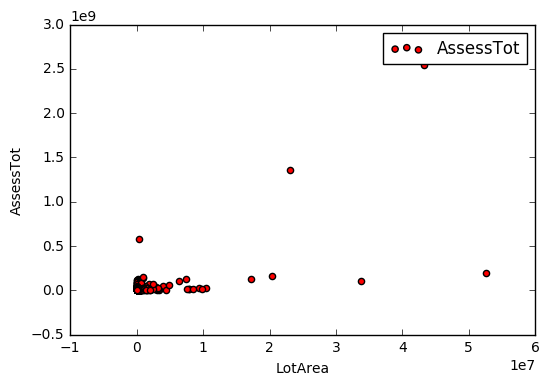

In [139]:
plt.scatter(data_4.LotArea,data_4.AssessTot,c='r')
plt.xlabel("LotArea")
plt.ylabel("AssessTot")
plt.legend()
plt.show()

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [140]:
lg2 = smf.ols(formula="AssessTot~LotArea",data=data_4).fit()

In [141]:
lg2.params

Intercept    76868.391376
LotArea         21.160305
dtype: float64

In [142]:
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AssessTot   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Wed, 27 Sep 2017   Prob (F-statistic):               0.00
Time:                        00:47:50   Log-Likelihood:            -4.6214e+06
No. Observations:              275942   AIC:                         9.243e+06
Df Residuals:                  275940   BIC:                         9.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.687e+04   8649.652      8.887      0.000      5.99e+04  9.38e+04
LotArea       21.1603      0.051    415.161      0.000        21.060    21.260
==============================================================================
Omnibus:                  1261795.752   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   60345262637933.125
Skew:                         157.435   Prob(JB):                         0.00
Kurtosis:                   72448.966   Cond. No.                     1.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
print("w1 is {}, w0 is {}, R2 is {}".format(lg2.params[1],lg2.params[0],lg2.rsquared))

w1 is 21.1603050366, w0 is 76868.3913758, R2 is 0.38447323434


In [144]:
data_4["pred"] = data_4.LotArea*lg2.params[1]+lg2.params[0]

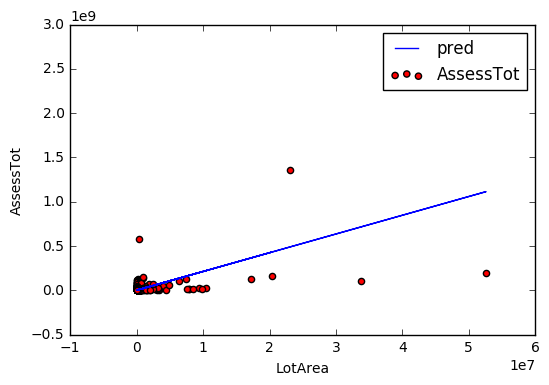

In [145]:
plt.scatter(data_4.LotArea,data_4.AssessTot,c='r')
plt.plot(data_4.LotArea,data_4.pred,c='b')
plt.xlabel("LotArea")
plt.ylabel("AssessTot")
plt.legend()
plt.show()

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [146]:
lg3 = smf.ols(formula="AssessTot~LotArea-1",data=data_4).fit()
print("w1 is {}, R2 is {}".format(lg3.params[0],lg3.rsquared))

w1 is 21.1739954474, R2 is 0.384928026064


In [147]:
data_4["pred_without_intercept"] = data_4.LotArea*lg3.params[0]

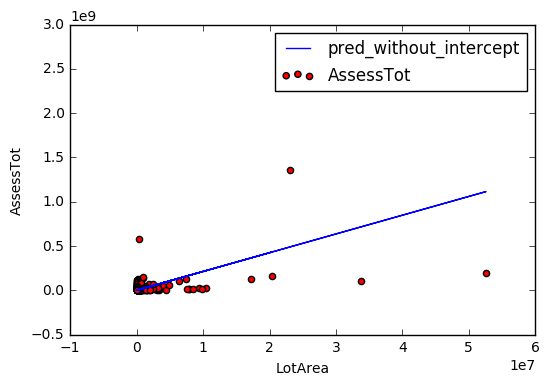

In [148]:
plt.scatter(data_4.LotArea,data_4.AssessTot,c='r')
plt.plot(data_4.LotArea,data_4.pred_without_intercept,c='b')
plt.xlabel("LotArea")
plt.ylabel("AssessTot")
plt.legend()
plt.show()

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [149]:
data_4["log_AssessTot"]=np.log(data_4.AssessTot)
data_4["log_LotArea"]=np.log(data_4.LotArea)
data_4.head()

,ZipCode,LotArea,AssessTot,pred,pred_without_intercept,log_AssessTot,log_LotArea
0,11201.0,126975,3922200,2.763698e+06,2.688568e+06,15.182163,11.751745
1,11201.0,52600,1359900,1.189900e+06,1.113752e+06,14.122922,10.870471
2,11201.0,17700,656100,4.514058e+05,3.747797e+05,13.394068,9.781320
5,11201.0,8120,5976000,2.486901e+05,1.719328e+05,15.603262,9.002085
6,11201.0,1297,56954,1.043133e+05,2.746267e+04,10.949999,7.167809


In [150]:
lg4 = smf.ols(formula="log_AssessTot~log_LotArea",data=data_4).fit()

In [151]:
lg4.params

Intercept      0.208794
log_LotArea    1.324973
dtype: float64

In [152]:
lg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_AssessTot   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Wed, 27 Sep 2017   Prob (F-statistic):               0.00
Time:                        00:47:58   Log-Likelihood:            -3.4454e+05
No. Observations:              275942   AIC:                         6.891e+05
Df Residuals:                  275940   BIC:                         6.891e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.2088      0.020     10.345      0.000         0.169     0.248
log_LotArea     1.3250      0.003    515.625      0.000         1.320     1.330
==============================================================================
Omnibus:                    29138.667   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197341.462
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                       7.106   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
print("w1 is {}, w0 is {}, R2 is {}".format(lg4.params[1],lg4.params[0],lg4.rsquared))

w1 is 1.32497333191, w0 is 0.20879395748, R2 is 0.490706561371


In [154]:
data_4["log_pred"]=data_4.log_LotArea*lg4.params[1]+lg4.params[0]

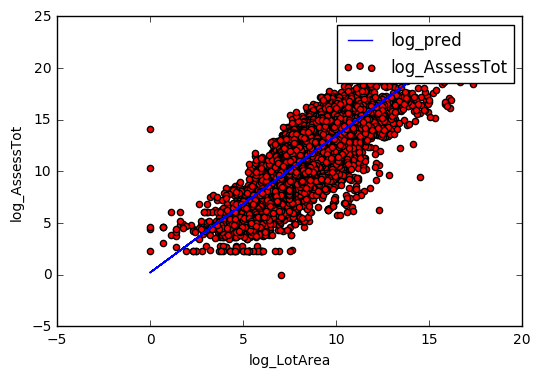

In [155]:
plt.scatter(data_4.log_LotArea,data_4.log_AssessTot,c='r')
plt.plot(data_4.log_LotArea,data_4.log_pred,c='b')
plt.xlabel("log_LotArea")
plt.ylabel("log_AssessTot")
plt.legend()
plt.show()

## We can see that without log, the assesstot data was extremely skewed towards left so this leads to a very small w1 compared to w0 which means that lotarea has little influence on assesstot. However, after logarithm the assesstot data was more  uniformly distributed over lotarea data so the w1 here is quite big compared to w0 which means that lotarea could have not small impact on assesstot.